In [2]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from causalimpact import CausalImpact

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


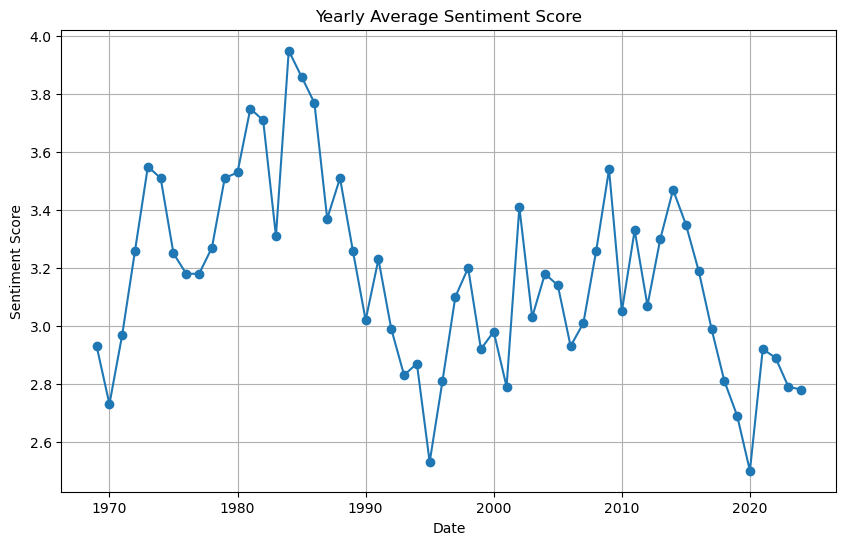

In [90]:
# us - china
with open('yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sentiment_score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Yearly Average Sentiment Score')
plt.grid(True)
plt.show()


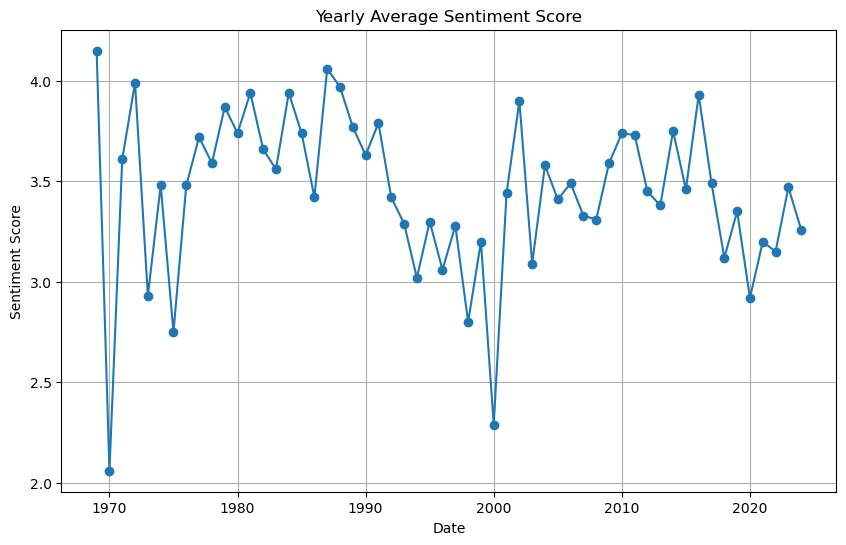

In [91]:
# us - canada
with open('canada_yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df2 = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['sentiment_score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Yearly Average Sentiment Score')
plt.grid(True)
plt.show()

In [134]:
# combine dataframe
date_range = pd.date_range(start="1969", periods=len(df), freq='Y')
data = df['sentiment_score'].values
data_frame= pd.DataFrame(data, columns=['us-china'])
data2 = df2['sentiment_score'].values
data_frame['us-canada'] = data2
data_frame.index = date_range
data_frame.tail(10)

,us-china,us-canada
2015-12-31,3.35,3.46
2016-12-31,3.19,3.93
2017-12-31,2.99,3.49
2018-12-31,2.81,3.12
2019-12-31,2.69,3.35
2020-12-31,2.50,2.92
2021-12-31,2.92,3.20
2022-12-31,2.89,3.15
2023-12-31,2.79,3.47
2024-12-31,2.78,3.26


In [189]:
# trump became president in 2016
pre_period = [pd.to_datetime('1969-12-31'), pd.to_datetime('2015-12-31')]
post_period = [pd.to_datetime('2016-12-31'), pd.to_datetime('2024-12-31')]

impact = CausalImpact(data_frame, pre_period, post_period)
impact.run()

c:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [194]:
impact.inferences.tail(5)

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
2020-12-31,2.50,165.88,3.292399,2.562744,4.022055,167.961483,-460.846989,796.769954,-0.792399,-0.062744,-1.522055,-2.533626,0.490447,-5.557698
2021-12-31,2.92,168.80,3.324280,2.542395,4.106165,171.285762,-458.304594,800.876119,-0.404280,0.377605,-1.186165,-2.937905,0.868052,-6.743863
2022-12-31,2.89,171.69,3.318587,2.487749,4.149425,174.604349,-455.816845,805.025544,-0.428587,0.402251,-1.259425,-3.366492,1.270303,-8.003288
2023-12-31,2.79,174.48,3.355022,2.477959,4.232085,177.959371,-453.338886,809.257628,-0.565022,0.312041,-1.442085,-3.931514,1.582344,-9.445372
2024-12-31,2.78,177.26,3.331111,2.410141,4.252082,181.290483,-450.928745,813.509710,-0.551111,0.369859,-1.472082,-4.482626,1.952203,-10.917454


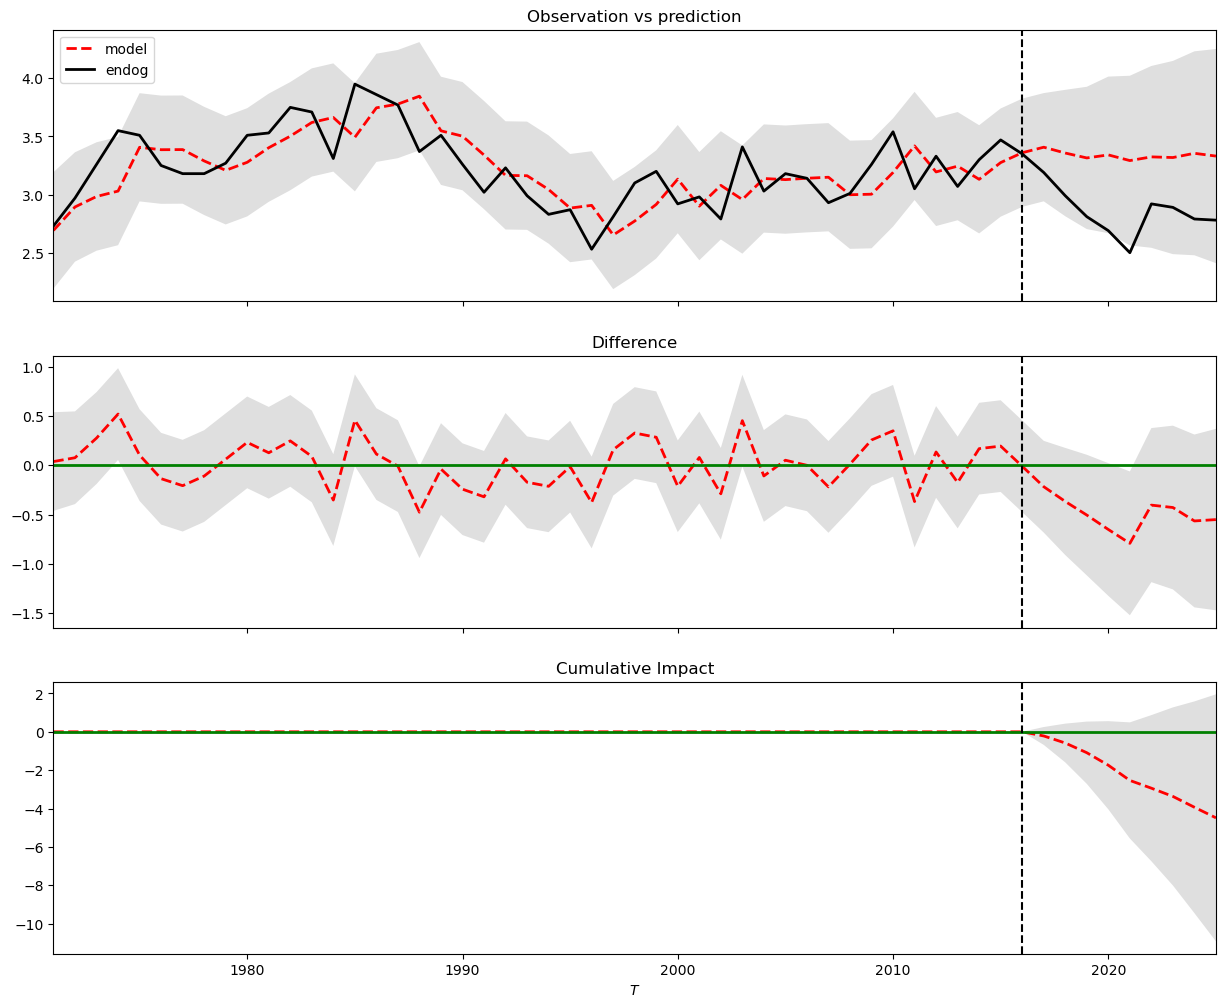

In [195]:
# # 画出因果影响分析结果
impact.plot()

In [193]:
impact.summary()

                               Average      Cumulative
Actual                               2              25
Predicted                            3              30
95% CI                          [2, 4]        [23, 36]
                                                      
Absolute Effect                      0              -4
95% CI                         [0, -1]        [1, -10]
                                                      
Relative Effect                 -14.9%          -14.9%
95% CI                  [6.5%, -36.3%]  [6.5%, -36.3%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                
